In [8]:
import pandas as pd
import numpy as np

# Load the dataset 
df = pd.read_csv("C:\\Users\\Nidhi\\OneDrive\\Desktop\\global\\district.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       1656 non-null   object 
 1   Parameters     1656 non-null   object 
 2   Year           1656 non-null   int64  
 3   Month          1656 non-null   object 
 4   Value          1437 non-null   float64
 5   Precipitation  1656 non-null   float64
 6   Temperature    1656 non-null   float64
 7   Wind           1656 non-null   float64
 8   Humidity       1656 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 116.6+ KB


In [3]:
df.head()

,District,Parameters,Year,Month,Value,Precipitation,Temperature,Wind,Humidity
0,Ajmer,Number of cases of Malaria reported,2010,April,6.0,0.076667,32.020000,20.570000,17.560000
1,Ajmer,Number of cases of Malaria reported,2010,May,5.0,0.000000,34.800000,25.854839,21.832258
2,Ajmer,Number of cases of Malaria reported,2010,June,4.0,1.013333,34.670000,25.820000,36.380000
3,Ajmer,Number of cases of Malaria reported,2010,July,2.0,5.361290,30.370968,18.732258,67.348387
4,Ajmer,Number of cases of Malaria reported,2010,August,2.0,7.306452,27.409677,15.393548,83.325806


In [5]:
print(df['Value'].dtype)

float64


In [10]:
import pandas as pd

# assume 'df' is your Pandas DataFrame

missing_values_count = df.isnull().sum()
total_values_count = df.size
percent_missing = (missing_values_count.sum() / total_values_count) * 100

print(f"Percent of missing data: {percent_missing:.2f}%")

Percent of missing data: 1.47%


In [11]:
# Drop rows with missing values
df.dropna(inplace=True)

In [12]:
# remove outliers 

import pandas as pd
import numpy as np

# assume 'df' is your DataFrame

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dff = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

print(dff)

      District                            Parameters  Year     Month  Value  \
0        Ajmer  Number of cases of Malaria reported   2010     April    6.0   
1        Ajmer  Number of cases of Malaria reported   2010       May    5.0   
2        Ajmer  Number of cases of Malaria reported   2010      June    4.0   
3        Ajmer  Number of cases of Malaria reported   2010      July    2.0   
4        Ajmer  Number of cases of Malaria reported   2010    August    2.0   
...        ...                                   ...   ...       ...    ...   
1650  Jhalawar  Number of cases of Malaria reported   2015   October    5.0   
1651  Jhalawar  Number of cases of Malaria reported   2015  November   19.0   
1652  Jhalawar  Number of cases of Malaria reported   2015  December    4.0   
1653  Jhalawar  Number of cases of Malaria reported   2016   January    0.0   
1654  Jhalawar  Number of cases of Malaria reported   2016  February    0.0   

      Precipitation  Temperature       Wind   Humid

In [7]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1654
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       1271 non-null   object 
 1   Parameters     1271 non-null   object 
 2   Year           1271 non-null   int64  
 3   Month          1271 non-null   object 
 4   Value          1271 non-null   float64
 5   Precipitation  1271 non-null   float64
 6   Temperature    1271 non-null   float64
 7   Wind           1271 non-null   float64
 8   Humidity       1271 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 99.3+ KB


In [34]:
# Linear Regression


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score
import numpy as np

# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity', 'Temperature','Wind']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Classification Part
# Define a threshold to classify the number of cases as high or low
threshold = y.median()
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test_class, y_pred_class))

F1 Score: 0.563049853372434
              precision    recall  f1-score   support

           0       0.62      0.07      0.12       153
           1       0.40      0.94      0.56       102

    accuracy                           0.42       255
   macro avg       0.51      0.50      0.34       255
weighted avg       0.54      0.42      0.30       255



In [28]:
# Naive Bayes classifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score
import numpy as np


# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity', 'Temperature','Humidity']]
y = dff['Value']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Classification Part
# Define a threshold to classify the number of cases as high or low
threshold = y.median()
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test_class, y_pred_class))

F1 Score: 0.39263803680981596
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       153
           1       0.52      0.31      0.39       102

    accuracy                           0.61       255
   macro avg       0.58      0.56      0.55       255
weighted avg       0.59      0.61      0.59       255



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score
import numpy as np

# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity', 'Temperature','Humidity']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
#gb_model = gb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Classification Part
# Define a threshold to classify the number of cases as high or low
threshold = y.median()
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test_class, y_pred_class))

F1 Score: 0.5625
              precision    recall  f1-score   support

           0       0.68      0.16      0.26       153
           1       0.41      0.88      0.56       102

    accuracy                           0.45       255
   macro avg       0.54      0.52      0.41       255
weighted avg       0.57      0.45      0.38       255



  District                                         Parameters  Year   Month  \
0    Ajmer  Number of cases of Malaria reported in childre...  2010   April   
1    Ajmer  Number of cases of Malaria reported in childre...  2010     May   
2    Ajmer  Number of cases of Malaria reported in childre...  2010    June   
3    Ajmer  Number of cases of Malaria reported in childre...  2010    July   
4    Ajmer  Number of cases of Malaria reported in childre...  2010  August   

   Value  Precipitation  Temperature       Wind   Humidity  
0    6.0       0.076667    32.020000  20.570000  17.560000  
1    5.0       0.000000    34.800000  25.854839  21.832258  
2    4.0       1.013333    34.670000  25.820000  36.380000  
3    2.0       5.361290    30.370968  18.732258  67.348387  
4    2.0       7.306452    27.409677  15.393548  83.325806  
              Year        Value  Precipitation  Temperature         Wind  \
count  1271.000000  1271.000000    1271.000000  1271.000000  1271.000000   
mean   

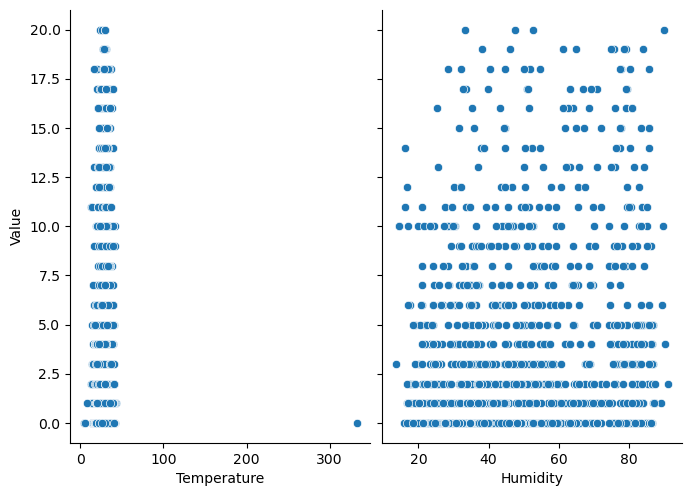

                Value  Temperature  Humidity
Value        1.000000     0.042207  0.207232
Temperature  0.042207     1.000000  0.129642
Humidity     0.207232     0.129642  1.000000


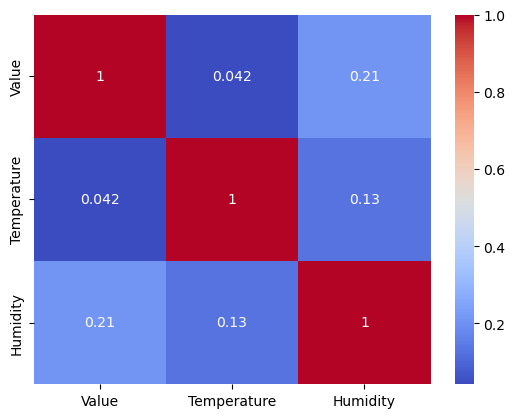

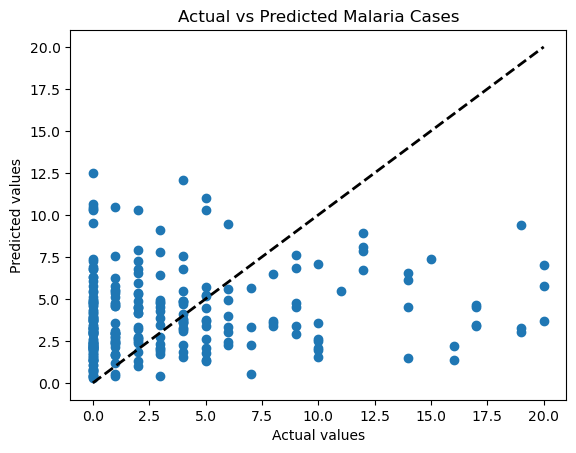

F1 Score: 0.5741935483870968
              precision    recall  f1-score   support

           0       0.72      0.22      0.34       153
           1       0.43      0.87      0.57       102

    accuracy                           0.48       255
   macro avg       0.58      0.55      0.46       255
weighted avg       0.61      0.48      0.43       255



In [30]:
# Random Forest Regressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score
import numpy as np

# Load the dataset
#df = pd.read_csv("C:\\Users\\Nidhi\\OneDrive\\Desktop\\testmalaria.csv")

# Display the first few rows of the dataset
print(dff.head())

# Exploratory Data Analysis
# Descriptive statistics
print(dff.describe())

# Check for missing values
print(dff.isnull().sum())

# Visualize the relationship between weather variables and malaria cases
sns.pairplot(dff, x_vars=['Temperature', 'Humidity'], y_vars='Value', height=5, aspect=0.7)
plt.show()

# Correlation matrix
corr_matrix = dff[['Value', 'Temperature', 'Humidity']].corr()
print(corr_matrix)

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Prepare the data for regression analysis
X = dff[['Precipitation', 'Humidity', 'Temperature','Humidity']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Malaria Cases')
#plt.show()

# add middle line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect prediction')

plt.show()
# Classification Part
# Define a threshold to classify the number of cases as high or low
threshold = y.median()
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test_class, y_pred_class))


In [161]:
print(y_pred_class)

[1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 1 1 1]


In [33]:
corr_matrix = dff[['Precipitation', 'Humidity', 'Temperature','Wind', 'Value']].corr()
print(corr_matrix)

               Precipitation  Humidity  Temperature      Wind     Value
Precipitation       1.000000  0.487800     0.105615  0.130656  0.186435
Humidity            0.487800  1.000000     0.129642  0.088839  0.207232
Temperature         0.105615  0.129642     1.000000  0.169433  0.042207
Wind                0.130656  0.088839     0.169433  1.000000  0.144552
Value               0.186435  0.207232     0.042207  0.144552  1.000000


C:\Users\Nidhi\AppData\Local\Temp\ipykernel_11636\1689498482.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dff.corr()


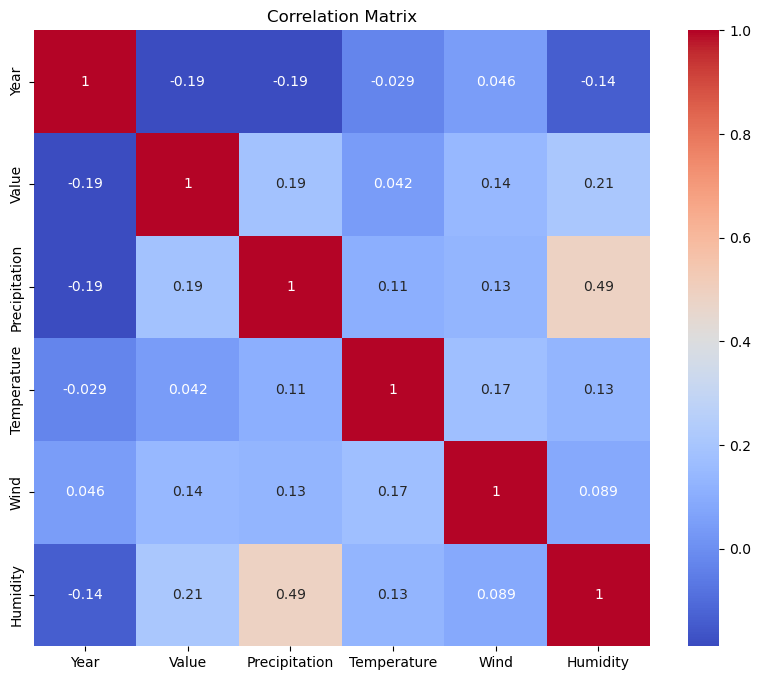

Value            1.000000
Humidity         0.207232
Precipitation    0.186435
Wind             0.144552
Temperature      0.042207
Name: Value, dtype: float64


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = dff.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Get the top 5 features correlated with the target variable
target_corr = corr_matrix['Value'].sort_values(ascending=False).head(5)
print(target_corr)

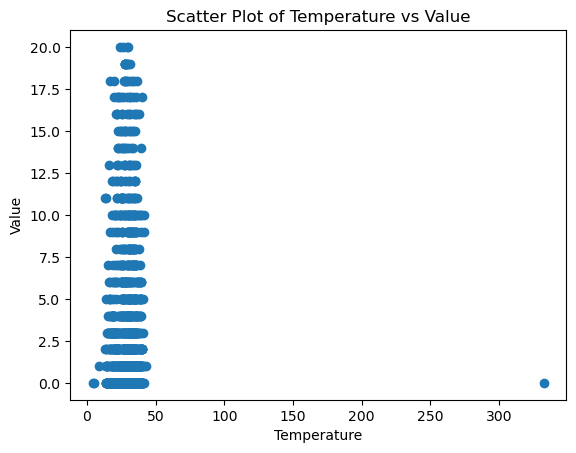

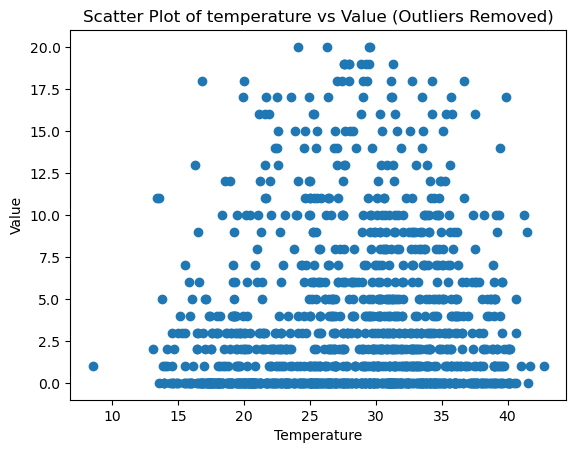

In [46]:

import matplotlib.pyplot as plt
import pandas as pd

# Create a scatter plot of wind vs value
plt.scatter(dff['Temperature'], dff['Value'])
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.title('Scatter Plot of Temperature vs Value')
plt.show()

# Calculate the interquartile range (IQR) for the value column
Q1 = dff['Temperature'].quantile(0.25)
Q3 = dff['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers from the DataFrame
data_filtered = dff[(dff['Temperature'] >= lower_bound) & (dff['Temperature'] <= upper_bound)]

# Create a new scatter plot with the filtered data
plt.figure()
plt.scatter(data_filtered['Temperature'], data_filtered['Value'])
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.title('Scatter Plot of temperature vs Value (Outliers Removed)')

plt.show()

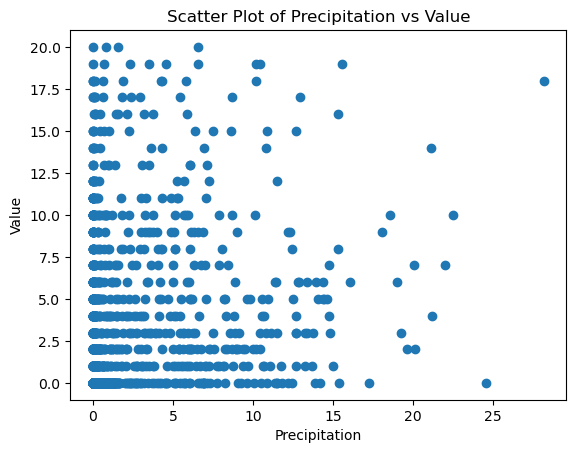

In [36]:
plt.scatter(dff['Precipitation'], dff['Value'])
plt.xlabel('Precipitation')
plt.ylabel('Value')
plt.title('Scatter Plot of Precipitation vs Value')
plt.show()

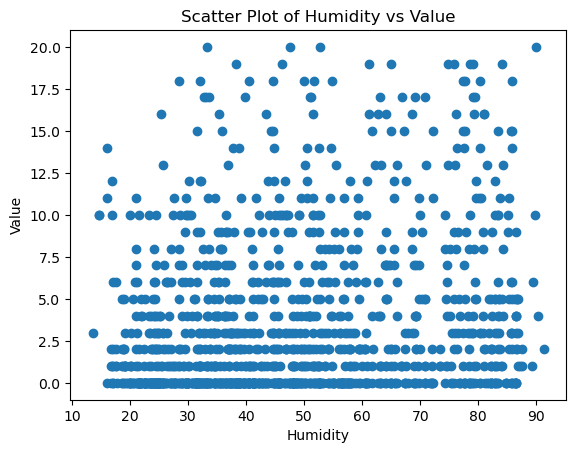

In [37]:
plt.scatter(dff['Humidity'], dff['Value'])
plt.xlabel('Humidity')
plt.ylabel('Value')
plt.title('Scatter Plot of Humidity vs Value')
plt.show()

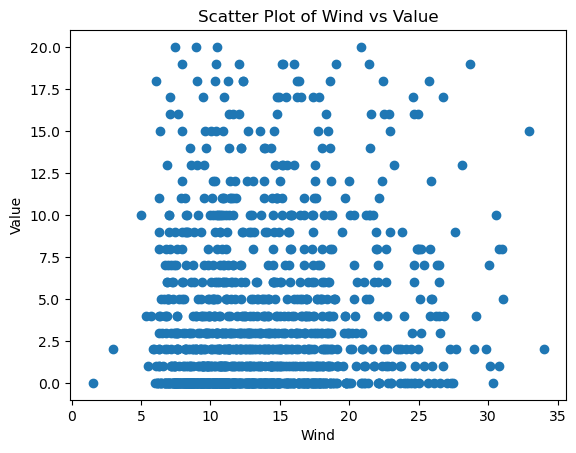

In [39]:
plt.scatter(dff['Wind'], dff['Value'])
plt.xlabel('Wind')
plt.ylabel('Value')
plt.title('Scatter Plot of Wind vs Value')
plt.show()

               Precipitation  Humidity  Temperature      Wind     Value
Precipitation       1.000000  0.487800     0.105615  0.130656  0.186435
Humidity            0.487800  1.000000     0.129642  0.088839  0.207232
Temperature         0.105615  0.129642     1.000000  0.169433  0.042207
Wind                0.130656  0.088839     0.169433  1.000000  0.144552
Value               0.186435  0.207232     0.042207  0.144552  1.000000


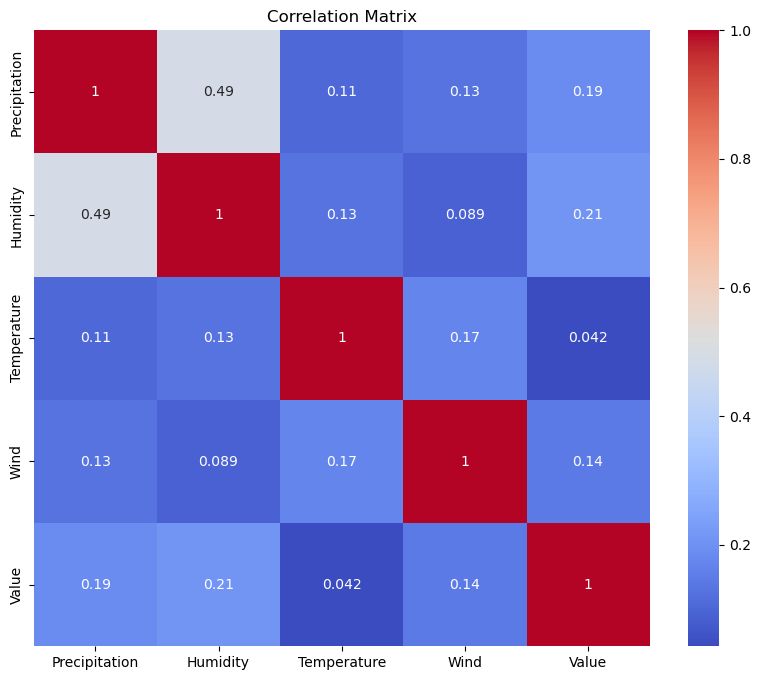

Precipitation Correlation: 0.1864345294055238
Humidity Correlation: 0.2072322904094815
Temperature Correlation: 0.04220738995480917
Wind Correlation: 0.14455223575183795


In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate correlation between 'Precipitation', 'Humidity', 'Temperature', 'Wind' against 'Value'
correlation = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind', 'Value']].corr()

# Print the correlation matrix
print(correlation)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Calculate the correlation coefficient between each feature and 'Value'
precipitation_corr = dff['Precipitation'].corr(dff['Value'])
humidity_corr = dff['Humidity'].corr(dff['Value'])
temperature_corr = dff['Temperature'].corr(dff['Value'])
wind_corr = dff['Wind'].corr(dff['Value'])

print(f"Precipitation Correlation: {precipitation_corr}")
print(f"Humidity Correlation: {humidity_corr}")
print(f"Temperature Correlation: {temperature_corr}")
print(f"Wind Correlation: {wind_corr}")

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score


# Split the dataset into features (X) and target (y)
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression without regularization
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_class = (y_pred_lr > 0.5).astype(int)  # Convert predictions to binary class labels
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr_class))
print("Linear Regression F1 Score (macro):", f1_score(y_test, y_pred_lr_class, average='macro'))

# L1 Regularization (Lasso Regression)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso_class = (y_pred_lasso > 0.5).astype(int)  # Convert predictions to binary class labels
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression Accuracy:", accuracy_score(y_test, y_pred_lasso_class))
print("Lasso Regression F1 Score (macro):", f1_score(y_test, y_pred_lasso_class, average='macro'))

# L2 Regularization (Ridge Regression)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge_class = (y_pred_ridge > 0.5).astype(int)  # Convert predictions to binary class labels
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression Accuracy:", accuracy_score(y_test, y_pred_ridge_class))
print("Ridge Regression F1 Score (macro):", f1_score(y_test, y_pred_ridge_class, average='macro'))

Linear Regression MSE: 22.44114197570082
Linear Regression Accuracy: 0.12549019607843137
Linear Regression F1 Score (macro): 0.011736658719970658
Lasso Regression MSE: 22.382372083242
Lasso Regression Accuracy: 0.12549019607843137
Lasso Regression F1 Score (macro): 0.011736658719970658
Ridge Regression MSE: 22.441133492949188
Ridge Regression Accuracy: 0.12549019607843137
Ridge Regression F1 Score (macro): 0.011736658719970658


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming dff is your dataset
# Separate features and target variable
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_predictions = ridge.predict(X_test_scaled)

# Evaluate Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)  # RMSE
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f'Ridge Regression MAE: {ridge_mae}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Ridge Regression RMSE: {ridge_rmse}')
print(f'Ridge Regression R²: {ridge_r2}')

# Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_predictions = lasso.predict(X_test_scaled)

# Evaluate Lasso Regression
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)  # RMSE
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f'Lasso Regression MAE: {lasso_mae}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Lasso Regression RMSE: {lasso_rmse}')
print(f'Lasso Regression R²: {lasso_r2}')


Ridge Regression MAE: 3.54750540204951
Ridge Regression MSE: 22.439678253983647
Ridge Regression RMSE: 4.737053752490429
Ridge Regression R²: -0.015711088540959928
Lasso Regression MAE: 3.5325876446953335
Lasso Regression MSE: 22.218249183049092
Lasso Regression RMSE: 4.7136237846320626
Lasso Regression R²: -0.005688308350979998


In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

# Assuming the dataset and models are already defined and trained
# Define the features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge and Lasso regression models
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Function to predict value using Ridge and Lasso models
def predict_value(precipitation, humidity, temperature, wind):
    input_data = np.array([[precipitation, humidity, temperature, wind]])
    input_data_scaled = scaler.transform(input_data)
    
    ridge_prediction = ridge.predict(input_data_scaled)[0]
    lasso_prediction = lasso.predict(input_data_scaled)[0]
    
    return {
        'Ridge Prediction': ridge_prediction,
        'Lasso Prediction': lasso_prediction
    }

# Example usage
precipitation = 0  # Example input values
humidity = 17
temperature = 32
wind = 20

predictions = predict_value(precipitation, humidity, temperature, wind)
print(f"Ridge Prediction: {predictions['Ridge Prediction']}")
print(f"Lasso Prediction: {predictions['Lasso Prediction']}")


Ridge Prediction: 2.963050471036678
Lasso Prediction: 2.990036280397422


C:\Users\Nidhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming dff is already loaded as a pandas DataFrame with columns 'Precipitation', 'Humidity', 'Temperature', 'Wind', and 'Value'
# Sample data creation (replace this with actual data loading)
# dff = pd.read_csv('your_dataset.csv')

# Check for any missing values and handle them if necessary
dff.dropna(inplace=True)

# Define features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(max_depth=3, gamma=5, eta=0.1, reg_alpha=1, reg_lambda=1, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Define a function to print regression metrics
def print_regression_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'{model_name} Regression Metrics:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    print()

# Evaluate the model on the test data
print_regression_metrics(y_test, y_test_pred, 'XGBoost')

# Define a function to predict malaria value based on input weather data
def predict_malaria_value(precipitation, humidity, temperature, wind):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Precipitation': [precipitation],
        'Humidity': [humidity],
        'Temperature': [temperature],
        'Wind': [wind]
    })

    # Standardize the input features
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction using the trained model
    prediction = xgb_model.predict(input_data_scaled)

    return prediction[0]

# Example usage of the prediction function
precipitation = 50
humidity = 75
temperature = 25
wind = 10

predicted_value = predict_malaria_value(precipitation, humidity, temperature, wind)
print(f'Predicted malaria value: {predicted_value}')


XGBoost Regression Metrics:
MAE: 3.632427817816828
MSE: 23.317174549817643
RMSE: 4.828786032722681
R²: -0.05543013922182172

Predicted malaria value: 10.925564765930176


C:\Users\Nidhi\AppData\Local\Temp\ipykernel_12352\2418500756.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.dropna(inplace=True)


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming dff is already loaded as a pandas DataFrame with columns 'Precipitation', 'Humidity', 'Temperature', 'Wind', and 'Value'
# Sample data creation (replace this with actual data loading)
# dff = pd.read_csv('your_dataset.csv')

# Check for any missing values and handle them if necessary
dff.dropna(inplace=True)

# Define features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)

# Define a function to print regression metrics
def print_regression_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'{model_name} Regression Metrics:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    print()

# Evaluate the model on the test data
print_regression_metrics(y_test, y_test_pred, 'Decision Tree')

# Define a function to predict malaria value based on input weather data
def predict_malaria_value(precipitation, humidity, temperature, wind):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Precipitation': [precipitation],
        'Humidity': [humidity],
        'Temperature': [temperature],
        'Wind': [wind]
    })

    # Standardize the input features
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction using the trained model
    prediction = dt_model.predict(input_data_scaled)

    return prediction[0]

# Example usage of the prediction function
precipitation = 50
humidity = 75
temperature = 25
wind = 10

predicted_value = predict_malaria_value(precipitation, humidity, temperature, wind)
print(f'Predicted malaria value: {predicted_value}')


Decision Tree Regression Metrics:
MAE: 4.792156862745098
MSE: 46.870588235294115
RMSE: 6.846209771493576
R²: -1.1215534223880494

Predicted malaria value: 6.0


C:\Users\Nidhi\AppData\Local\Temp\ipykernel_12352\2584122739.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.dropna(inplace=True)


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming dff is your dataset with a binary target variable
# Convert the target variable to binary if it's not already
# For example, if 'Value' > threshold then 1, else 0 (assuming threshold is known)
threshold = 10  # Example threshold
dff['BinaryValue'] = (dff['Value'] > threshold).astype(int)

# Define features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['BinaryValue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression with L2 regularization and class weights
log_reg_l2_weighted = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced')
log_reg_l2_weighted.fit(X_train_scaled, y_train)
l2_weighted_predictions = log_reg_l2_weighted.predict(X_test_scaled)

# Function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f'{model_name} Evaluation Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{cm}')
    print()

# Print evaluation metrics for the model
print_evaluation_metrics(y_test, l2_weighted_predictions, 'Logistic Regression with L2 Regularization and Class Weights')

# Function to predict value using the trained model
def predict_value(precipitation, humidity, temperature, wind, scaler, model):
    input_data = np.array([[precipitation, humidity, temperature, wind]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)[0]
    probability = model.predict_proba(input_data_scaled)[0]
    
    return {
        'Prediction': prediction,
        'Probability': probability
    }

# Example usage of prediction function
precipitation = 100  # Example input values
humidity = 70
temperature = 30
wind = 10

prediction = predict_value(precipitation, humidity, temperature, wind, scaler, log_reg_l2_weighted)
print(f"Prediction: {prediction['Prediction']}")
print(f"Probability: {prediction['Probability']}")


Logistic Regression with L2 Regularization and Class Weights Evaluation Metrics:
Accuracy: 0.6235294117647059
Precision: 0.13
Recall: 0.5909090909090909
F1 Score: 0.21311475409836067
Confusion Matrix:
[[146  87]
 [  9  13]]

Prediction: 1
Probability: [0.42699836 0.57300164]


C:\Users\Nidhi\AppData\Local\Temp\ipykernel_8868\2173599676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['BinaryValue'] = (dff['Value'] > threshold).astype(int)
C:\Users\Nidhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
!pip install xgboost


                                              0.0/124.9 MB ? eta -:--:--
                                              0.1/124.9 MB 2.4 MB/s eta 0:00:53
                                              0.6/124.9 MB 6.8 MB/s eta 0:00:19
                                             2.1/124.9 MB 15.0 MB/s eta 0:00:09
     -                                       4.5/124.9 MB 24.0 MB/s eta 0:00:06
     --                                      6.5/124.9 MB 27.8 MB/s eta 0:00:05
     ---                                     9.7/124.9 MB 34.6 MB/s eta 0:00:04
     ---                                    11.5/124.9 MB 50.4 MB/s eta 0:00:03
     ----                                   14.6/124.9 MB 54.7 MB/s eta 0:00:03
     -----                                  17.9/124.9 MB 59.5 MB/s eta 0:00:02
     ------                                 20.8/124.9 MB 65.6 MB/s eta 0:00:02
     -------                                24.2/124.9 MB 65.2 MB/s eta 0:00:02
     --------                               27.

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming dff is your dataset with a binary target variable
# Convert the target variable to binary if it's not already
threshold = 10  # Example threshold
dff['BinaryValue'] = (dff['Value'] > threshold).astype(int)

# Define features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['BinaryValue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the XGBoost model
xgb_model = XGBClassifier(
    max_depth=3,          # Low values to restrict the maximum depth of trees
    gamma=5,              # High values to make the model more conservative
    eta=0.1,              # High values to control the learning rate
    reg_alpha=1,          # High values for L1 regularization
    reg_lambda=1,         # High values for L2 regularization
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
def print_evaluation_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f'{model_name} Evaluation Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{cm}')
    print()

# Print evaluation metrics
print_evaluation_metrics(y_test, xgb_predictions, 'XGBoost with Regularization')

# Function to predict value using the trained model
def predict_value_xgb(precipitation, humidity, temperature, wind, scaler, model):
    input_data = np.array([[precipitation, humidity, temperature, wind]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)[0]
    probability = model.predict_proba(input_data_scaled)[0]
    
    return {
        'Prediction': prediction,
        'Probability': probability
    }

# Example usage of prediction function
precipitation = 100  # Example input values
humidity = 70
temperature = 30
wind = 10

prediction = predict_value_xgb(precipitation, humidity, temperature, wind, scaler, xgb_model)
print(f"Prediction: {prediction['Prediction']}")
print(f"Probability: {prediction['Probability']}")


C:\Users\Nidhi\AppData\Local\Temp\ipykernel_8868\792642159.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['BinaryValue'] = (dff['Value'] > threshold).astype(int)


XGBoost with Regularization Evaluation Metrics:
Accuracy: 0.9137254901960784
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[233   0]
 [ 22   0]]

Prediction: 0
Probability: [0.8300708  0.16992922]


C:\Users\Nidhi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:36:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Nidhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
# Install imbalanced-learn if not already installed
# !pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming dff is your dataset with a binary target variable
# Convert the target variable to binary if it's not already
threshold = 10  # Example threshold
dff['BinaryValue'] = (dff['Value'] > threshold).astype(int)

# Define features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['BinaryValue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Set up the XGBoost model with regularization and class weights
xgb_model = XGBClassifier(
    max_depth=3,          # Low values to restrict the maximum depth of trees
    gamma=5,              # High values to make the model more conservative
    eta=0.1,              # High values to control the learning rate
    reg_alpha=1,          # High values for L1 regularization
    reg_lambda=1,         # High values for L2 regularization
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled)  # Adjusting for class imbalance
)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
def print_evaluation_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f'{model_name} Evaluation Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{cm}')
    print()

# Print evaluation metrics
print_evaluation_metrics(y_test, xgb_predictions, 'XGBoost with SMOTE and Regularization')

# Function to predict value using the trained model
def predict_value_xgb(precipitation, humidity, temperature, wind, scaler, model):
    input_data = np.array([[precipitation, humidity, temperature, wind]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)[0]
    probability = model.predict_proba(input_data_scaled)[0]
    
    return {
        'Prediction': prediction,
        'Probability': probability
    }

# Example usage of prediction function
precipitation = 100  # Example input values
humidity = 70
temperature = 30
wind = 10

prediction = predict_value_xgb(precipitation, humidity, temperature, wind, scaler, xgb_model)
print(f"Prediction: {prediction['Prediction']}")
print(f"Probability: {prediction['Probability']}")


XGBoost with SMOTE and Regularization Evaluation Metrics:
Accuracy: 0.49019607843137253
Precision: 0.13013698630136986
Recall: 0.8636363636363636
F1 Score: 0.2261904761904762
Confusion Matrix:
[[106 127]
 [  3  19]]

Prediction: 1
Probability: [0.21453893 0.78546107]


C:\Users\Nidhi\AppData\Local\Temp\ipykernel_8868\2372344521.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['BinaryValue'] = (dff['Value'] > threshold).astype(int)
C:\Users\Nidhi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Nidhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Assuming dff is your dataset with the target variable 'Value'
# Define features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model
xgb_model = XGBRegressor(
    max_depth=3,          # Restricting the maximum depth of trees
    gamma=5,              # Making the model more conservative
    eta=0.1,              # Learning rate
    reg_alpha=1,          # L1 regularization
    reg_lambda=1          # L2 regularization
)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions_train = xgb_model.predict(X_train_scaled)
xgb_predictions_test = xgb_model.predict(X_test_scaled)

# Train the Ridge regression model (as a linear regression with regularization)
ridge_model = Ridge(alpha=1.0)  # L2 regularization
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions_train = ridge_model.predict(X_train_scaled)
ridge_predictions_test = ridge_model.predict(X_test_scaled)

# Combine the predictions
train_combined = np.vstack((xgb_predictions_train, ridge_predictions_train)).T
test_combined = np.vstack((xgb_predictions_test, ridge_predictions_test)).T

# Train a meta-model (e.g., another linear regression) on the combined predictions
meta_model = LinearRegression()
meta_model.fit(train_combined, y_train)
final_predictions = meta_model.predict(test_combined)

# Evaluate the combined model
def print_regression_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'{model_name} Regression Metrics:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    print()

print_regression_metrics(y_test, final_predictions, 'Combined XGBoost and Ridge Regression')

# Function to predict value using the combined model
def predict_value_combined(precipitation, humidity, temperature, wind, scaler, xgb_model, ridge_model, meta_model):
    input_data = np.array([[precipitation, humidity, temperature, wind]])
    input_data_scaled = scaler.transform(input_data)

    xgb_pred = xgb_model.predict(input_data_scaled)[0]
    ridge_pred = ridge_model.predict(input_data_scaled)[0]

    combined_input = np.array([[xgb_pred, ridge_pred]])
    final_pred = meta_model.predict(combined_input)[0]
    
    return final_pred

# Example usage of prediction function
precipitation = 0  # Example input values
humidity = 37
temperature = 25
wind = 9

combined_prediction = predict_value_combined(precipitation, humidity, temperature, wind, scaler, xgb_model, ridge_model, meta_model)
print(f"Combined Prediction: {combined_prediction}")


Combined XGBoost and Ridge Regression Regression Metrics:
MAE: 3.8592749626547653
MSE: 27.49557429341119
RMSE: 5.243622249305454
R²: -0.2445615030447963

Combined Prediction: 3.1004691871485273


C:\Users\Nidhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
# Install imbalanced-learn if not already installed
# !pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from collections import Counter

# Assuming dff is your dataset with the target variable 'Value'
# Define features and target
X = dff[['Precipitation', 'Humidity', 'Temperature', 'Wind']]
y = dff['Value']

# Check class distribution
print('Class distribution before SMOTE:', Counter(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the dataset if there are enough samples
try:
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    print('Class distribution after SMOTE:', Counter(y_train_resampled))
except ValueError as e:
    print('SMOTE failed:', e)
    print('Using RandomOverSampler instead')
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)
    print('Class distribution after RandomOverSampler:', Counter(y_train_resampled))

# Train the XGBoost model
xgb_model = XGBRegressor(
    max_depth=3,          # Low values to restrict the maximum depth of trees
    gamma=5,              # High values to make the model more conservative
    eta=0.1,              # Learning rate
    reg_alpha=1,          # L1 regularization
    reg_lambda=1          # L2 regularization
)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_predictions_train = xgb_model.predict(X_train_resampled)
xgb_predictions_test = xgb_model.predict(X_test_scaled)

# Train the Ridge regression model (as a linear regression with regularization)
ridge_model = Ridge(alpha=1.0)  # L2 regularization
ridge_model.fit(X_train_resampled, y_train_resampled)
ridge_predictions_train = ridge_model.predict(X_train_resampled)
ridge_predictions_test = ridge_model.predict(X_test_scaled)

# Train the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=3)  # You can adjust the max_depth parameter
tree_model.fit(X_train_resampled, y_train_resampled)
tree_predictions_train = tree_model.predict(X_train_resampled)
tree_predictions_test = tree_model.predict(X_test_scaled)

# Combine the predictions
train_combined = np.vstack((xgb_predictions_train, ridge_predictions_train, tree_predictions_train)).T
test_combined = np.vstack((xgb_predictions_test, ridge_predictions_test, tree_predictions_test)).T

# Train a meta-model (e.g., another linear regression) on the combined predictions
meta_model = LinearRegression()
meta_model.fit(train_combined, y_train_resampled)
final_predictions = meta_model.predict(test_combined)

# Evaluate the combined model
def print_regression_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'{model_name} Regression Metrics:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')
    print()

print_regression_metrics(y_test, final_predictions, 'Combined XGBoost, Ridge, and Decision Tree Regression with SMOTE')

# Function to predict value using the combined model
def predict_value_combined(precipitation, humidity, temperature, wind, scaler, xgb_model, ridge_model, tree_model, meta_model):
    input_data = np.array([[precipitation, humidity, temperature, wind]])
    input_data_scaled = scaler.transform(input_data)

    xgb_pred = xgb_model.predict(input_data_scaled)[0]
    ridge_pred = ridge_model.predict(input_data_scaled)[0]
    tree_pred = tree_model.predict(input_data_scaled)[0]

    combined_input = np.array([[xgb_pred, ridge_pred, tree_pred]])
    final_pred = meta_model.predict(combined_input)[0]
    
    return final_pred

# Example usage of prediction function
precipitation = 100  # Example input values
humidity = 70
temperature = 30
wind = 10

combined_prediction = predict_value_combined(precipitation, humidity, temperature, wind, scaler, xgb_model, ridge_model, tree_model, meta_model)
print(f"Combined Prediction: {combined_prediction}")


Class distribution before SMOTE: Counter({0.0: 477, 1.0: 145, 2.0: 121, 3.0: 97, 4.0: 72, 5.0: 60, 6.0: 47, 10.0: 39, 7.0: 33, 9.0: 31, 8.0: 28, 11.0: 23, 12.0: 14, 15.0: 13, 13.0: 12, 17.0: 12, 16.0: 12, 14.0: 11, 18.0: 11, 19.0: 9, 20.0: 4})
SMOTE failed: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2
Using RandomOverSampler instead
Class distribution after RandomOverSampler: Counter({5.0: 380, 1.0: 380, 0.0: 380, 3.0: 380, 6.0: 380, 2.0: 380, 11.0: 380, 8.0: 380, 17.0: 380, 18.0: 380, 4.0: 380, 12.0: 380, 7.0: 380, 10.0: 380, 13.0: 380, 16.0: 380, 15.0: 380, 9.0: 380, 19.0: 380, 20.0: 380, 14.0: 380})
Combined XGBoost, Ridge, and Decision Tree Regression with SMOTE Regression Metrics:
MAE: 5.616541354159103
MSE: 43.65514592783366
RMSE: 6.607204093096691
R²: -0.9760094279828924

Combined Prediction: 7.574349525026829


C:\Users\Nidhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
from scipy.stats import spearmanr

# Define the columns to analyze
parameters = ['Precipitation', 'Temperature', 'Wind', 'Humidity']

# Create a dictionary to store correlation results
correlations = {}

# Calculate Spearman correlation for each parameter
for param in parameters:
    corr, _ = spearmanr(dff['Value'], dff[param])
    correlations[param] = corr

# Print the correlation results
for param, corr in correlations.items():
    print(f"Spearman correlation between malaria value and {param}: {corr:.3f}")


Spearman correlation between malaria value and Precipitation: 0.169
Spearman correlation between malaria value and Temperature: 0.136
Spearman correlation between malaria value and Wind: 0.163
Spearman correlation between malaria value and Humidity: 0.204


In [24]:
# Define the weather parameters
parameters = ['Precipitation', 'Temperature', 'Wind', 'Humidity']

# Calculate Spearman correlations
correlation_data = {param: [dff[['Value', param]].corr(method='spearman').loc['Value', param]] for param in parameters}
correlation_df = pd.DataFrame(correlation_data, index=['Spearman Correlation']).T


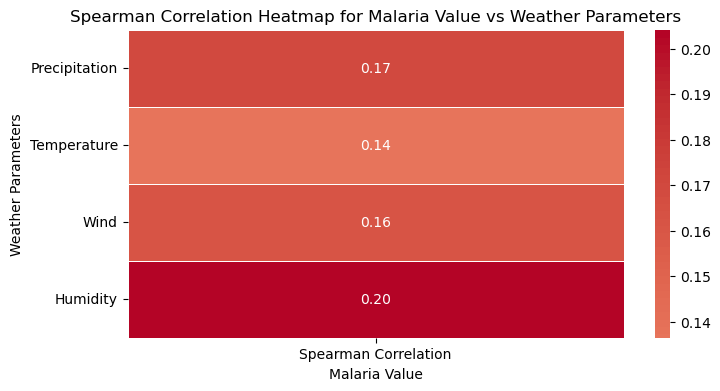

In [28]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Create the heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Spearman Correlation Heatmap for Malaria Value vs Weather Parameters')
plt.xlabel('Malaria Value')
plt.ylabel('Weather Parameters')

plt.show()


C:\Users\Nidhi\AppData\Local\Temp\ipykernel_23732\1046541666.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr_matrix = dff.corr(method='spearman')


Spearman's correlation matrix:
                    Year     Value  Precipitation  Temperature      Wind  \
Year           1.000000 -0.289387      -0.063008    -0.071444  0.070955   
Value         -0.289387  1.000000       0.169283     0.136498  0.162589   
Precipitation -0.063008  0.169283       1.000000     0.324719  0.273062   
Temperature   -0.071444  0.136498       0.324719     1.000000  0.284114   
Wind           0.070955  0.162589       0.273062     0.284114  1.000000   
Humidity      -0.129989  0.204186       0.522913     0.181470  0.103634   

               Humidity  
Year          -0.129989  
Value          0.204186  
Precipitation  0.522913  
Temperature    0.181470  
Wind           0.103634  
Humidity       1.000000  


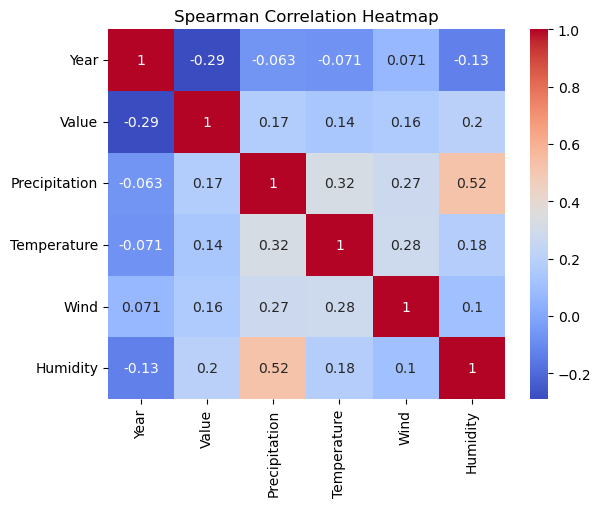

In [17]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Spearman's correlation matrix
spearman_corr_matrix = dff.corr(method='spearman')
print("Spearman's correlation matrix:\n", spearman_corr_matrix)

# Plot heatmap of Spearman's correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Heatmap')
plt.show()


In [19]:
import pandas as pd
from scipy.stats import spearmanr

# List of weather parameters
weather_params = ['Precipitation', 'Temperature', 'Wind', 'Humidity']

# Function to calculate Spearman's correlation between 'Value' and weather parameters
def calculate_spearman(df):
    return df[weather_params + ['Value']].corr(method='spearman')['Value'].drop('Value')

# Group by 'District' and calculate Spearman's correlation for each group
district_corrs = dff.groupby('District').apply(calculate_spearman)

# Print the correlation values for each district
for district, corr in district_corrs.groupby(level=0):
    print(f"Spearman's correlation for District {district}:\n")
    print(corr)
    print()


Spearman's correlation for District Ajmer:

Value     Precipitation  Temperature      Wind  Humidity
District                                                
Ajmer          0.047223     0.166226 -0.055051  0.216676

Spearman's correlation for District Alwar:

Value     Precipitation  Temperature     Wind  Humidity
District                                               
Alwar          0.275227     0.123447 -0.15502  0.437795

Spearman's correlation for District Banswara:

Value     Precipitation  Temperature     Wind  Humidity
District                                               
Banswara       0.009144     0.232868  0.16062  0.073998

Spearman's correlation for District Baran:

Value     Precipitation  Temperature      Wind  Humidity
District                                                
Baran         -0.062233     0.082934  0.081204 -0.122623

Spearman's correlation for District Barmer:

Value     Precipitation  Temperature      Wind  Humidity
District                             

In [18]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Spearman's correlation for a DataFrame
def calculate_spearman(df):
    return df.corr(method='spearman')

# Group by 'District' and calculate Spearman's correlation for each group
district_corrs = dff.groupby('District').apply(calculate_spearman)

print("Spearman's correlation for each district:\n", district_corrs)


Spearman's correlation for each district:
                             Year     Value  Precipitation  Temperature  \
District                                                                 
Ajmer    Year           1.000000 -0.383580      -0.028625    -0.130587   
         Value         -0.383580  1.000000       0.047223     0.166226   
         Precipitation -0.028625  0.047223       1.000000     0.407962   
         Temperature   -0.130587  0.166226       0.407962     1.000000   
         Wind          -0.031766 -0.055051       0.423383     0.810009   
...                          ...       ...            ...          ...   
kota     Value         -0.527011  1.000000       0.150769    -0.125957   
         Precipitation -0.034371  0.150769       1.000000     0.350927   
         Temperature    0.226559 -0.125957       0.350927     1.000000   
         Wind          -0.377672  0.285508       0.375300     0.279027   
         Humidity      -0.172675  0.231657       0.583899     0.55368

C:\Users\Nidhi\AppData\Local\Temp\ipykernel_12352\3952475245.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.corr(method='spearman')
